In [1]:
from qiskit import *
from qiskit.circuit.library import UnitaryGate
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
simulator = AerSimulator()

import numpy as np
import math
import random

from sympy import Matrix
from sympy.physics.quantum import TensorProduct

import matplotlib.pyplot as plt

In [2]:
e= math.e
pi = math.pi
i = 1j

In [3]:
def R(k):
    Rk = np.array([[1,0],
                   [0, e**(2*pi*i/(2**k))]])
    
    return Rk

# Inverse of above function
def nR(k):
    Rk = np.array([[1,0],
                   [0, e**(2*pi*i/(2**k))]])
    
    nRk = np.linalg.inv(Rk)
    
    return nRk

In [228]:
# input a quantum circuit and the number of qubits on it

def QFT(qc, size, start):
    # The R_k unitaries
    Rotations = {}
    for s in range(size+1):
         Rotations[s]=UnitaryGate(R(s),label=f'R_{s}').control(1)
    
    # Adding Hadamard and R_k gates to each qubit
    for qubit in range(start, start+size):
        qc.h(qubit)
        
        for gate in range(2,size-(qubit-start)+1):
            qc.append(Rotations[gate],[qubit+gate-1,qubit])
            
        qc.barrier()
    
    qc.save_statevector()
    
    return qc

In [253]:
def nQFT(qc, size, start):
    # Inverses of R_k
    Unrotations = {}
    for s in range(size+1):
        Unrotations[s]=UnitaryGate(nR(s),label=f'nR_{s}').control(1)
    
    # Adding Hadamard and R_k gates to each qubit
    for qubit in range(size+start-1,start-1,-1):
        for gate in range(size-(qubit-start), 1,-1):
            qc.append(Unrotations[gate],[qubit+gate-1,qubit])
        
        qc.h(qubit)
        
        qc.barrier()
    
    qc.save_statevector()
    
    return qc

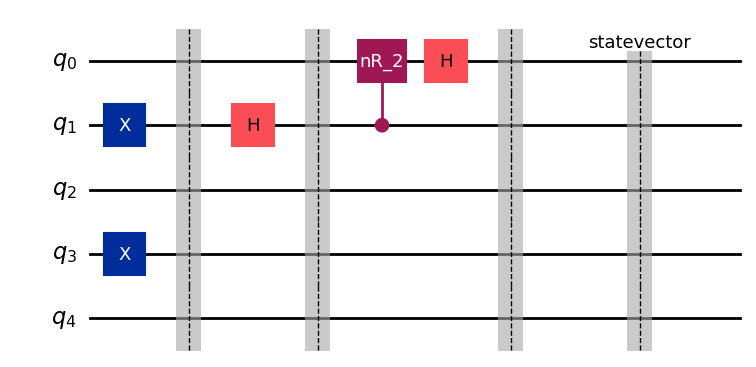

In [257]:
size=2
qc = QuantumCircuit(size+3)

# Input the binary string to run the fourier transform
initial = [0,1,0,1]

for s in range(len(initial)):
    if initial[s]==1:
        qc.x(s)
#initial_state = vector/np.linalg.norm(vector)
#qc.initialize(initial_state)qc.x(3)
qc.barrier()

# Fourier circuit
#QFT(qc,size,1)
nQFT(qc,size,0)

#qc.measure_all()
qc.draw(output='mpl')

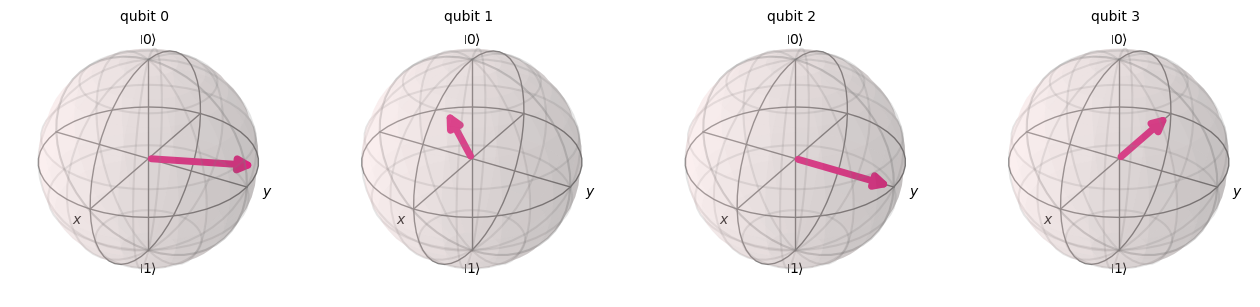

In [217]:
job = transpile(qc,backend=simulator)
shots = 1

result = simulator.run(job, shots=shots).result()
    
psi = result.get_statevector(0)
psi.draw(output='bloch')

In [160]:
for i in range(2,2):
    print(i)